Simple Power Method & Power Method with  Quadratic Extrapolation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def power_method(A,v,e=0.01):
  x0=np.array(v)
  l=[]
  delta=1
  k=1
  while (delta>e):
    x1=np.matmul(A,x0)
    print(x1)
    delta=np.linalg.norm((x1-x0),1)
    l.append(delta)
    x0=x1
    k=k+1
  iter_no=np.arange(2,k)
  plot1=plt.figure(figsize=(10,10)),plt.plot(iter_no,l[1:],color='b',marker='o',markersize=12,markerfacecolor='r',markeredgecolor='r',linewidth=5),
  plt.xlabel('No. of iteration'),plt.ylabel('delta'), plt.title('Convergence of Power Method')
  return(x1,k-1,l,plot1)

In [ ]:
def QE(x):
  y=[]
  beta=[]
  for j in range(1,4):
    t=x[j]-x[0]
    y.append(t)
  Y=[y[1],y[2]]
  Y=np.transpose(Y)
  Yplus=np.linalg.pinv(Y)
  gamma=-np.dot(Yplus,y[2])
  beta.append(gamma[0]+gamma[1]+1)
  beta.append(gamma[1]+1)
  beta.append(1)
  xnew=np.dot(beta[0],x[1])+np.dot(beta[1],x[2])+np.dot(beta[2],x[3])
  return(xnew)

In [ ]:
def QPM(A,v,epa=0.01):
    x=[]
    l1=[]
    x0=v
    x.append(x0)
    x.append(np.dot(A,x[0]))
    x.append(np.dot(A,x[1]))
    x.append(np.dot(A,x[2]))
    delta=1
    k=0
    while delta>epa:
      delta = np.linalg.norm(x[3]-x[2],1)
      l1.append(delta)
      x[3]=QE(x)
      x.append(np.dot(A,x[3]))
      x=x[1:] 
      k+=1
    iter_no=list(range(1,k))
    plot2=plt.figure(figsize=(10,10)),plt.plot(iter_no,l1[1:],color='b',marker='o',markersize=12,markerfacecolor='r',markeredgecolor='r',linewidth=5),plt.xlabel('No. of iteration'),plt.ylabel('delta'),
    plt.title('Convergence of Quadratic Power Method')
    return(x[3],k-1)

In [ ]:
pgrank_mt=np.array([[0.1,0.2,0.2,0.1,0.3,0,0.5,0,0.3,0.6],[0.1,0,0.1,0.1,0.3,0,0,0,0.1,0],[0,0.2,0,0.1,0,0,0,0,0,0],[0.1,0,0,0.1,0,0,0,1,0,0.2],[0.1,0.2,0.3,0.1,0.2,0.4,0,0,0.2,0],[0.2,0,0.1,0.1,0,0,0.5,0,0,0],
                     [0.2,0.2,0.1,0.1,0,0.1,0,0,0.1,0.1],[0.1,0,0,0.1,0,0.1,0,0,0,0.1],[0,0.2,0.2,0.1,0.2,0.4,0,0,0.1,0],[0.1,0,0,0.1,0,0,0,0,0.2,0]])
v=np.array([0.1,0.2,0,0,0.1,0.3,0,0.1,0,0.2])

In [ ]:
pgrank_mt

array([[0.1, 0.2, 0.2, 0.1, 0.3, 0. , 0.5, 0. , 0.3, 0.6],
       [0.1, 0. , 0.1, 0.1, 0.3, 0. , 0. , 0. , 0.1, 0. ],
       [0. , 0.2, 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0. , 0. , 0.1, 0. , 0. , 0. , 1. , 0. , 0.2],
       [0.1, 0.2, 0.3, 0.1, 0.2, 0.4, 0. , 0. , 0.2, 0. ],
       [0.2, 0. , 0.1, 0.1, 0. , 0. , 0.5, 0. , 0. , 0. ],
       [0.2, 0.2, 0.1, 0.1, 0. , 0.1, 0. , 0. , 0.1, 0.1],
       [0.1, 0. , 0. , 0.1, 0. , 0.1, 0. , 0. , 0. , 0.1],
       [0. , 0.2, 0.2, 0.1, 0.2, 0.4, 0. , 0. , 0.1, 0. ],
       [0.1, 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.2, 0. ]])

(array([0.21778464, 0.09084322, 0.02695498, 0.08783815, 0.15297115,
        0.10547584, 0.10085616, 0.04652604, 0.11680203, 0.05394779]),
 9,
 [1.34,
  0.504,
  0.1654,
  0.05564000000000003,
  0.023201999999999973,
  0.009000199999999917,
  0.0031049999999999862,
  0.0013831959999999373,
  0.0005529417999999738],
 (<Figure size 720x720 with 1 Axes>,
  [<matplotlib.lines.Line2D at 0x7f31647d4310>]))

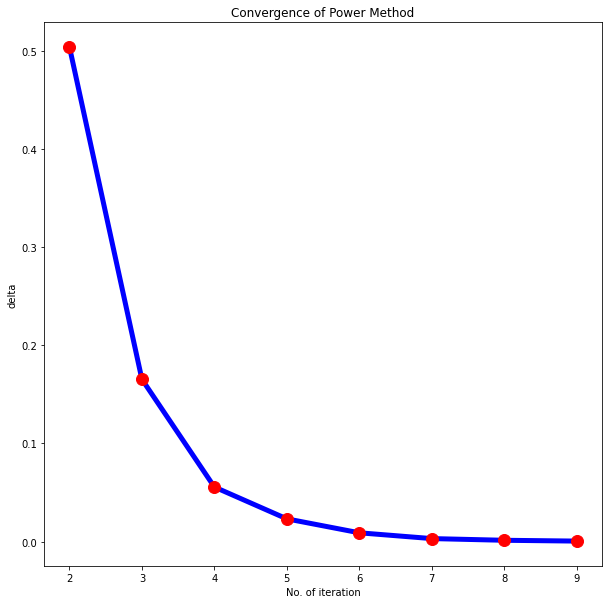

In [ ]:
power_method(pgrank_mt,v,0.001)

(array([0.21785063, 0.09082932, 0.02695246, 0.08787788, 0.15296239,
        0.10546432, 0.10082745, 0.04650464, 0.11680822, 0.05392268]), 6)

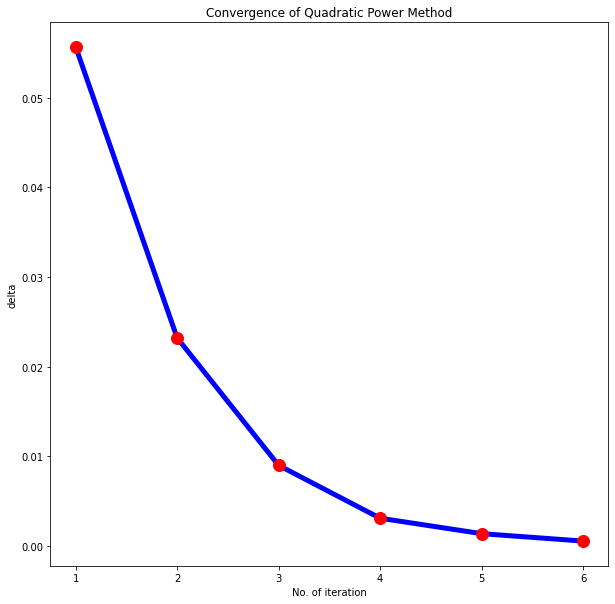

In [ ]:
QPM(pgrank_mt,v,0.001)